# Data cleaning
import libraries

In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

featching raw dataset

In [2]:
MainDf=pd.read_csv('./DataFrames/MainDataFrame_raw.csv')

In [3]:
MainDf

,Unnamed: 0,Country,Year,Total inland transport infrastructure investment,Rail infrastructure maintenance,Road casualties (injured + killed),Road injury accident,Total inland passenger transport,Road passenger transport,Total inland freight transport in tonne-km per one thousand units of current USD GDP,...,Total Locomotives - Number at 31.12,Total pipelines operated - Length at 31.12 (km),Total transported - Tonnes (1000),Total goods - Tonnes (1 000),Total inland waterways - Length at 31.12 (km),Total railway enterprises - Number at 31.12,Total new mopeds - Number at 31.12 (Unit),Total self-propelled vessels - Number at 31.12 (Units),Total expenditures in road transport vehicles - Million national currency (current prices),Total expenditure in inland waterway vessels - Million national currency (current prices)
0,0,Albania,2000,110 421 157,3 838 572,620,428,5 424,(E) 5 299,630.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Armenia,2000,..,..,1 377,937,1 484,1 437,..,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Australia,2000,4 111 727 074,NaN,28 591,NaN,268 358,256 806,694.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Austria,2000,1 674 000 000,508 000 000,55 905,42 126,NaN,NaN,221.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Azerbaijan,2000,35 096 212,..,2 199,1 987,9 646,9 153,3 035.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,1339,"""Serbia, Republic of""",2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1340,1340,Colombia,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1341,1341,Serbia,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1342,1342,United Kingdom,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's look at the columns

In [4]:
MainDf.columns

Index(['Unnamed: 0', 'Country', 'Year',
       'Total inland transport infrastructure investment',
       'Rail infrastructure maintenance', 'Road casualties (injured + killed)',
       'Road injury accident', 'Total inland passenger transport',
       'Road passenger transport',
       'Total inland freight transport in tonne-km per one thousand units of current USD GDP',
       'Road motor vehicles per one million units of current USD GDP',
       'Road fatalities per one million inhabitant',
       'CO2 emissions from transport in tonnes per one million units of current USD GDP',
       'Total inland transport infrastructure capital value',
       'Road traffic in vehicle-km per one thousand units of current USD GDP',
       'Density of road (km per one hundred sq. km)',
       'Share of household expenditure for purchase of vehicles in total household expenditure for transport',
       'Total passengers - Number (1 000)',
       'Total injury accidents - Number at 31.12 (Unit)',
  

We whould like to rearrange the columns so the 'killed' column (which is our most important parameter) will appear last 

In [5]:
cols=['Unnamed: 0', 'Country', 'Year',
       'Total inland transport infrastructure investment',
       'Rail infrastructure maintenance',
        'Total inland passenger transport',
       'Road passenger transport',
       'Total inland freight transport in tonne-km per one thousand units of current USD GDP',
       'Road motor vehicles per one million units of current USD GDP',
       'CO2 emissions from transport in tonnes per one million units of current USD GDP',
       'Total inland transport infrastructure capital value',
       'Road traffic in vehicle-km per one thousand units of current USD GDP',
       'Density of road (km per one hundred sq. km)',
       'Share of household expenditure for purchase of vehicles in total household expenditure for transport',
       'Total passengers - Number (1 000)',
       'Total of train movements - Train-km [IV-07] (1 000)',
       'Total Lines - Length operated at 31.12 (km)',
       'Total Tracks - Length operated at 31.12 (km)',
       'Total mopeds - Number at 31.12 (Unit)',
       'Total motorways - Length operated at 31.12 (km)',
       'Total passengers - Passenger-km (millions)',
       'Total oil pipeline transport - Tonnes (1 000)',
       'Total vehicle movements - Vehicle-km (millions)',
       'Total gas pipelines - length at 31.12 - km',
        'Total Locomotives - Number at 31.12',
       'Total pipelines operated - Length at 31.12 (km)',
       'Total transported - Tonnes (1000)', 'Total goods - Tonnes (1 000)',
       'Total inland waterways - Length at 31.12 (km)',
       'Total railway enterprises - Number at 31.12',
       'Total new mopeds - Number at 31.12 (Unit)',
       'Total self-propelled vessels - Number at 31.12 (Units)',
       'Total expenditures in road transport vehicles - Million national currency (current prices)',
       'Total expenditure in inland waterway vessels - Million national currency (current prices)',
       'Road casualties (injured + killed)','Road injury accident',
       'Road fatalities per one million inhabitant','Total injury accidents - Number at 31.12 (Unit)',
       'Killed - rate per population', 'Killed']

In [6]:
MainDf=MainDf.reindex(columns=cols)

This is what we got

In [7]:
MainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 40 columns):
 #   Column                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                --------------  ----- 
 0   Unnamed: 0                                                                                            1344 non-null   int64 
 1   Country                                                                                               1344 non-null   object
 2   Year                                                                                                  1344 non-null   int64 
 3   Total inland transport infrastructure investment                                                      1029 non-null   object
 4   Rail infrastructure maintenance                                                                       882 no

In [8]:
MainDf.isna().sum()

Unnamed: 0                                                                                                 0
Country                                                                                                    0
Year                                                                                                       0
Total inland transport infrastructure investment                                                         315
Rail infrastructure maintenance                                                                          462
Total inland passenger transport                                                                         504
Road passenger transport                                                                                 504
Total inland freight transport in tonne-km per one thousand units of current USD GDP                     273
Road motor vehicles per one million units of current USD GDP                                             294
CO2 emissions from 

Too much NaNs won't help us , let's despose of some of them
** we will stage each meaningfull modification by naming the datafreme with a prfix c#

In [9]:
MainDf_c1=MainDf.dropna(axis=0,thresh=15)

In [10]:
MainDf_c1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 1328
Data columns (total 40 columns):
 #   Column                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                --------------  ----- 
 0   Unnamed: 0                                                                                            836 non-null    int64 
 1   Country                                                                                               836 non-null    object
 2   Year                                                                                                  836 non-null    int64 
 3   Total inland transport infrastructure investment                                                      782 non-null    object
 4   Rail infrastructure maintenance                                                                       700 non

In [11]:
MainDf_c1.describe(include='all')

,Unnamed: 0,Country,Year,Total inland transport infrastructure investment,Rail infrastructure maintenance,Total inland passenger transport,Road passenger transport,Total inland freight transport in tonne-km per one thousand units of current USD GDP,Road motor vehicles per one million units of current USD GDP,CO2 emissions from transport in tonnes per one million units of current USD GDP,...,Total new mopeds - Number at 31.12 (Unit),Total self-propelled vessels - Number at 31.12 (Units),Total expenditures in road transport vehicles - Million national currency (current prices),Total expenditure in inland waterway vessels - Million national currency (current prices),Road casualties (injured + killed),Road injury accident,Road fatalities per one million inhabitant,Total injury accidents - Number at 31.12 (Unit),Killed - rate per population,Killed
count,836.000000,836,836.000000,782,700,681,661,788,800,770,...,168,216,90,81,827,816,818,387,328,328
unique,NaN,50,NaN,722,583,546,536,690,686,594,...,134,115,58,28,791,790,605,320,103,294
top,NaN,Slovenia,NaN,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,2.8,..
freq,NaN,21,NaN,55,66,134,125,64,45,9,...,28,35,30,30,29,19,27,64,12,4
mean,717.730861,NaN,2010.794258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,0.000000,NaN,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,410.750000,NaN,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,759.500000,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1030.250000,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All of the data is consists of strings we need to convert it to numeric values

values with '..' means missing values

In [12]:
MainDf_c2=MainDf_c1.replace('..',np.nan)
MainDf_c2.drop("Unnamed: 0",axis=1,inplace=True)
MainDf_c2.reset_index(drop=True)


,Country,Year,Total inland transport infrastructure investment,Rail infrastructure maintenance,Total inland passenger transport,Road passenger transport,Total inland freight transport in tonne-km per one thousand units of current USD GDP,Road motor vehicles per one million units of current USD GDP,CO2 emissions from transport in tonnes per one million units of current USD GDP,Total inland transport infrastructure capital value,...,Total new mopeds - Number at 31.12 (Unit),Total self-propelled vessels - Number at 31.12 (Units),Total expenditures in road transport vehicles - Million national currency (current prices),Total expenditure in inland waterway vessels - Million national currency (current prices),Road casualties (injured + killed),Road injury accident,Road fatalities per one million inhabitant,Total injury accidents - Number at 31.12 (Unit),Killed - rate per population,Killed
0,Albania,2000,110 421 157,3 838 572,5 424,(E) 5 299,630.5,NaN,421.9,65 308 511,...,NaN,NaN,NaN,NaN,620,428,90.6,NaN,NaN,NaN
1,Belgium,2000,1 313 000 000,59 000 000,127 155,119 400,285.6,456.3,103.4,NaN,...,NaN,NaN,NaN,NaN,69 431,49 065,143.4,NaN,NaN,NaN
2,Bulgaria,2000,NaN,NaN,(B) 18 580,NaN,(B) 960.1,243.9,410.0,NaN,...,NaN,NaN,NaN,NaN,9 042,6 886,123.9,NaN,NaN,NaN
3,Canada,2000,4 334 159 860,5 883 897 316,503 548,502 000,NaN,455.8,201.4,NaN,...,NaN,NaN,NaN,NaN,225 752,155 838,94.6,NaN,NaN,NaN
4,Czech Republic,2000,690 656 615,202 478 387,(E) 80 591,(E) 73 291,941.9,335.4,192.0,NaN,...,NaN,NaN,NaN,NaN,33 925,25 445,144.9,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,Spain,2020,(E) 6 307 848 764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9,1 370
832,Sweden,2020,5 022 406 346,1 027 545 504,107 890,99 761,121.6,477.5,NaN,42 410 922 855,...,NaN,NaN,NaN,NaN,15 558,12 243,19.7,NaN,2.0,204
833,Switzerland,2020,NaN,NaN,NaN,NaN,NaN,539.4,NaN,NaN,...,NaN,NaN,NaN,NaN,20 022,16 897,26.3,NaN,2.6,227
834,United Kingdom,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,(P) 121 820,(P) 95 222,(P) 22.7,NaN,2.2,1 460


All the string values contains patterns "\xa0" which represents space, in addition there are some chars such as : (E), (B)

In [13]:
MainDf_c3=MainDf_c2.loc[:,"Country":"Year"]
MainDf_c3

,Country,Year
0,Albania,2000
6,Belgium,2000
7,Bulgaria,2000
8,Canada,2000
11,Czech Republic,2000
...,...,...
1323,Spain,2020
1324,Sweden,2020
1325,Switzerland,2020
1327,United Kingdom,2020


In [14]:
for col in MainDf_c2:
    if  col !="Country" and col!="Year":
        tempList=list()
        tempList=MainDf_c2[col].str.replace('\xa0','')
        tempList=tempList.str.lstrip('(MmBbPpEe)')
        tempList=tempList.replace('..',np.nan)
        MainDf_c3[col]=tempList.astype(float)
        


Now we need to check if al the data is numeric value , and explore the quality of the data in terms of missing values

In [15]:
MainDf_c3.describe()

,Year,Total inland transport infrastructure investment,Rail infrastructure maintenance,Total inland passenger transport,Road passenger transport,Total inland freight transport in tonne-km per one thousand units of current USD GDP,Road motor vehicles per one million units of current USD GDP,CO2 emissions from transport in tonnes per one million units of current USD GDP,Total inland transport infrastructure capital value,Road traffic in vehicle-km per one thousand units of current USD GDP,...,Total new mopeds - Number at 31.12 (Unit),Total self-propelled vessels - Number at 31.12 (Units),Total expenditures in road transport vehicles - Million national currency (current prices),Total expenditure in inland waterway vessels - Million national currency (current prices),Road casualties (injured + killed),Road injury accident,Road fatalities per one million inhabitant,Total injury accidents - Number at 31.12 (Unit),Killed - rate per population,Killed
count,836.000000,7.270000e+02,6.340000e+02,5.470000e+02,5.360000e+02,724.000000,755.000000,761.000000,2.760000e+02,568.00000,...,134.000000,181.000000,56.000000,48.000000,7.980000e+02,7.970000e+02,791.000000,3.230000e+02,321.000000,324.000000
mean,2010.794258,7.747196e+09,2.300650e+09,4.640591e+05,4.363389e+05,425.549586,431.285563,97.121156,6.643464e+10,258.19507,...,12095.119403,490.348066,20176.821429,48.916667,1.521235e+05,1.065059e+05,80.715424,7.862881e+04,5.378193,2416.287037
std,5.781305,1.519287e+10,5.603027e+09,1.009884e+06,1.000438e+06,546.121531,134.563327,62.934628,1.105009e+11,146.47045,...,21488.548876,1004.966382,95868.203846,169.257054,4.289755e+05,2.915152e+05,40.868634,2.553212e+05,2.218394,6337.905324
min,2000.000000,3.701352e+06,1.142863e+06,1.940000e+03,1.940000e+03,30.100000,69.900000,21.500000,5.633900e+06,7.20000,...,16.000000,1.000000,53.000000,0.000000,4.780000e+02,3.280000e+02,12.200000,8.300000e+02,1.200000,4.000000
25%,2006.000000,5.080177e+08,9.925000e+07,5.920100e+04,6.256425e+04,108.500000,345.900000,51.300000,7.043358e+08,170.45000,...,939.250000,23.000000,434.250000,1.000000,7.063500e+03,5.781000e+03,50.000000,4.974000e+03,3.700000,238.750000
50%,2011.000000,1.842830e+09,3.851000e+08,1.259180e+05,1.182780e+05,204.450000,454.800000,79.100000,5.340337e+09,211.85000,...,3436.500000,70.000000,794.000000,4.500000,2.071550e+04,1.554900e+04,72.200000,1.423300e+04,5.100000,608.500000
75%,2016.000000,8.044722e+09,1.407994e+09,4.263215e+05,3.884085e+05,485.775000,522.850000,118.200000,4.440056e+10,330.97500,...,13843.750000,704.000000,4252.000000,20.250000,1.075742e+05,6.728800e+04,104.000000,3.866700e+04,6.500000,2032.250000
max,2020.000000,1.058441e+11,4.826315e+10,6.591557e+06,6.558301e+06,3240.700000,757.000000,421.900000,3.902354e+11,1130.30000,...,107859.000000,5661.000000,713758.000000,1021.000000,3.231000e+06,2.151000e+06,248.400000,2.211000e+06,11.800000,38824.000000


In [16]:
MainDf_c3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 1328
Data columns (total 39 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Country                                                                                               836 non-null    object 
 1   Year                                                                                                  836 non-null    int64  
 2   Total inland transport infrastructure investment                                                      727 non-null    float64
 3   Rail infrastructure maintenance                                                                       634 non-null    float64
 4   Total inland passenger transport                                                                      5

In [17]:
MainDf_c3.isna().sum()

Country                                                                                                   0
Year                                                                                                      0
Total inland transport infrastructure investment                                                        109
Rail infrastructure maintenance                                                                         202
Total inland passenger transport                                                                        289
Road passenger transport                                                                                300
Total inland freight transport in tonne-km per one thousand units of current USD GDP                    112
Road motor vehicles per one million units of current USD GDP                                             81
CO2 emissions from transport in tonnes per one million units of current USD GDP                          75
Total inland transport infra

we can remove the rows that doesn't contain Killed values, this data we cannot complete by our own predictions

In [18]:
MainDf_c4=MainDf_c3.drop(MainDf_c3[MainDf_c3["Killed"].isna()].index)

After cleaning we got the following:

In [19]:
MainDf_c4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 642 to 1328
Data columns (total 39 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Country                                                                                               324 non-null    object 
 1   Year                                                                                                  324 non-null    int64  
 2   Total inland transport infrastructure investment                                                      288 non-null    float64
 3   Rail infrastructure maintenance                                                                       239 non-null    float64
 4   Total inland passenger transport                                                                     

In [20]:
MainDf_c4.isna().sum()

Country                                                                                                   0
Year                                                                                                      0
Total inland transport infrastructure investment                                                         36
Rail infrastructure maintenance                                                                          85
Total inland passenger transport                                                                        123
Road passenger transport                                                                                119
Total inland freight transport in tonne-km per one thousand units of current USD GDP                     50
Road motor vehicles per one million units of current USD GDP                                             12
CO2 emissions from transport in tonnes per one million units of current USD GDP                          30
Total inland transport infra

In [21]:
MainDf_c4.describe()

,Year,Total inland transport infrastructure investment,Rail infrastructure maintenance,Total inland passenger transport,Road passenger transport,Total inland freight transport in tonne-km per one thousand units of current USD GDP,Road motor vehicles per one million units of current USD GDP,CO2 emissions from transport in tonnes per one million units of current USD GDP,Total inland transport infrastructure capital value,Road traffic in vehicle-km per one thousand units of current USD GDP,...,Total new mopeds - Number at 31.12 (Unit),Total self-propelled vessels - Number at 31.12 (Units),Total expenditures in road transport vehicles - Million national currency (current prices),Total expenditure in inland waterway vessels - Million national currency (current prices),Road casualties (injured + killed),Road injury accident,Road fatalities per one million inhabitant,Total injury accidents - Number at 31.12 (Unit),Killed - rate per population,Killed
count,324.000000,2.880000e+02,2.390000e+02,2.010000e+02,2.050000e+02,274.000000,312.000000,294.000000,1.120000e+02,267.000000,...,81.000000,100.000000,26.000000,29.000000,3.040000e+02,3.030000e+02,318.000000,1.800000e+02,321.000000,324.000000
mean,2014.919753,1.017792e+10,3.066306e+09,6.106533e+05,5.515650e+05,207.503285,505.631090,63.465646,1.033849e+11,203.919476,...,18036.851852,555.690000,1446.923077,31.241379,1.672868e+05,1.148205e+05,54.108176,1.177509e+05,5.378193,2416.287037
std,3.138650,1.739625e+10,6.807504e+09,1.221391e+06,1.194845e+06,232.143919,96.831059,26.466227,1.289505e+11,92.063261,...,25384.479650,1122.997411,1213.169104,105.719188,4.429323e+05,2.934243e+05,22.046226,3.335504e+05,2.218394,6337.905324
min,2010.000000,3.791148e+07,2.780023e+07,5.392000e+03,5.392000e+03,30.100000,262.800000,21.500000,6.550000e+08,7.200000,...,160.000000,10.000000,425.000000,0.000000,1.015000e+03,7.270000e+02,12.200000,2.789000e+03,1.200000,4.000000
25%,2012.000000,1.266459e+09,1.790000e+08,7.691200e+04,7.177900e+04,77.275000,456.175000,42.125000,6.790820e+09,159.950000,...,2264.000000,43.000000,626.500000,0.000000,8.518750e+03,6.169500e+03,38.125000,7.824500e+03,3.700000,238.750000
50%,2015.000000,3.128391e+09,7.958524e+08,1.386430e+05,1.239800e+05,124.950000,509.150000,56.350000,2.640252e+10,193.100000,...,8267.000000,90.000000,879.500000,6.000000,2.685450e+04,1.852300e+04,51.250000,2.132450e+04,5.100000,608.500000
75%,2018.000000,1.411865e+10,2.407907e+09,7.956830e+05,7.213850e+05,190.300000,563.425000,81.625000,2.163231e+11,226.800000,...,19650.000000,815.750000,1690.500000,20.000000,1.405592e+05,9.999450e+04,64.950000,5.906900e+04,6.500000,2032.250000
max,2020.000000,1.058441e+11,4.826315e+10,6.591557e+06,6.558301e+06,1277.000000,757.000000,126.300000,3.902354e+11,486.500000,...,107859.000000,5661.000000,4264.000000,574.000000,3.098000e+06,2.151000e+06,117.400000,2.211000e+06,11.800000,38824.000000


reindexing the dataframe

In [22]:
MainDf_c5=MainDf_c4.reset_index(drop=True)

since we still have a lot of missing values , let's concintrate at the countries and despose of the countries who have reletively a lot of missing values

In [23]:
nanCount=list()
for i in MainDf_c5.index:
    nanCount.append(MainDf_c5.iloc[i,:].isna().sum())
MainDf_c5["NaNs_at_this_row"]=nanCount

In [24]:
MainDf_c5.describe()

,Year,Total inland transport infrastructure investment,Rail infrastructure maintenance,Total inland passenger transport,Road passenger transport,Total inland freight transport in tonne-km per one thousand units of current USD GDP,Road motor vehicles per one million units of current USD GDP,CO2 emissions from transport in tonnes per one million units of current USD GDP,Total inland transport infrastructure capital value,Road traffic in vehicle-km per one thousand units of current USD GDP,...,Total self-propelled vessels - Number at 31.12 (Units),Total expenditures in road transport vehicles - Million national currency (current prices),Total expenditure in inland waterway vessels - Million national currency (current prices),Road casualties (injured + killed),Road injury accident,Road fatalities per one million inhabitant,Total injury accidents - Number at 31.12 (Unit),Killed - rate per population,Killed,NaNs_at_this_row
count,324.000000,2.880000e+02,2.390000e+02,2.010000e+02,2.050000e+02,274.000000,312.000000,294.000000,1.120000e+02,267.000000,...,100.000000,26.000000,29.000000,3.040000e+02,3.030000e+02,318.000000,1.800000e+02,321.000000,324.000000,324.000000
mean,2014.919753,1.017792e+10,3.066306e+09,6.106533e+05,5.515650e+05,207.503285,505.631090,63.465646,1.033849e+11,203.919476,...,555.690000,1446.923077,31.241379,1.672868e+05,1.148205e+05,54.108176,1.177509e+05,5.378193,2416.287037,15.472222
std,3.138650,1.739625e+10,6.807504e+09,1.221391e+06,1.194845e+06,232.143919,96.831059,26.466227,1.289505e+11,92.063261,...,1122.997411,1213.169104,105.719188,4.429323e+05,2.934243e+05,22.046226,3.335504e+05,2.218394,6337.905324,8.320728
min,2010.000000,3.791148e+07,2.780023e+07,5.392000e+03,5.392000e+03,30.100000,262.800000,21.500000,6.550000e+08,7.200000,...,10.000000,425.000000,0.000000,1.015000e+03,7.270000e+02,12.200000,2.789000e+03,1.200000,4.000000,1.000000
25%,2012.000000,1.266459e+09,1.790000e+08,7.691200e+04,7.177900e+04,77.275000,456.175000,42.125000,6.790820e+09,159.950000,...,43.000000,626.500000,0.000000,8.518750e+03,6.169500e+03,38.125000,7.824500e+03,3.700000,238.750000,8.000000
50%,2015.000000,3.128391e+09,7.958524e+08,1.386430e+05,1.239800e+05,124.950000,509.150000,56.350000,2.640252e+10,193.100000,...,90.000000,879.500000,6.000000,2.685450e+04,1.852300e+04,51.250000,2.132450e+04,5.100000,608.500000,15.000000
75%,2018.000000,1.411865e+10,2.407907e+09,7.956830e+05,7.213850e+05,190.300000,563.425000,81.625000,2.163231e+11,226.800000,...,815.750000,1690.500000,20.000000,1.405592e+05,9.999450e+04,64.950000,5.906900e+04,6.500000,2032.250000,23.000000
max,2020.000000,1.058441e+11,4.826315e+10,6.591557e+06,6.558301e+06,1277.000000,757.000000,126.300000,3.902354e+11,486.500000,...,5661.000000,4264.000000,574.000000,3.098000e+06,2.151000e+06,117.400000,2.211000e+06,11.800000,38824.000000,34.000000


In [25]:
countryList=MainDf_c5["Country"].unique()

In [26]:
nanList=list()
for c in countryList:
    df=MainDf_c5[MainDf_c5["Country"]==c]
    s=sum(df["NaNs_at_this_row"])
    nanList.append(s)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

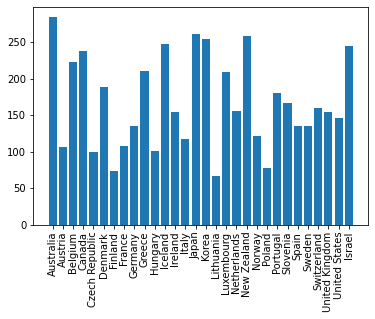

In [27]:
x=countryList
y=nanList

plt.bar(x,y)
plt.xticks(rotation=90)

(array([2., 1., 0., 0., 2., 2., 0., 2., 0., 3., 0., 1., 4., 1., 0., 1., 1.,
        0., 0., 2., 0., 1., 0., 1., 2., 1., 2., 0., 0., 1.]),
 array([ 66.        ,  73.26666667,  80.53333333,  87.8       ,
         95.06666667, 102.33333333, 109.6       , 116.86666667,
        124.13333333, 131.4       , 138.66666667, 145.93333333,
        153.2       , 160.46666667, 167.73333333, 175.        ,
        182.26666667, 189.53333333, 196.8       , 204.06666667,
        211.33333333, 218.6       , 225.86666667, 233.13333333,
        240.4       , 247.66666667, 254.93333333, 262.2       ,
        269.46666667, 276.73333333, 284.        ]),
 <BarContainer object of 30 artists>)

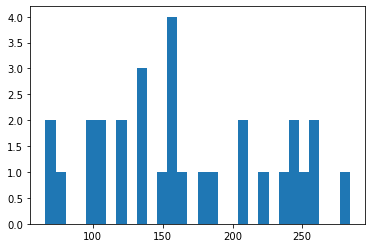

In [28]:
plt.hist(y,bins=30)

By looking at the histogram we can see that the majority cor the countries are around 155 missing values in this data frame

We will dispose of the countries who have more the 170 missing values in total , and of course exclude Israel =)

In [29]:
countryVsNansDf=pd.DataFrame({"Country":countryList,"NaNCount":nanList})

In [30]:
relevantCountries=countryVsNansDf[countryVsNansDf["NaNCount"]<170]
relevantCountries=relevantCountries["Country"]
RelevantCountriesList=relevantCountries.to_list()
RelevantCountriesList.append('Israel')


In [31]:
len(RelevantCountriesList)

19

In [32]:
MainDf_c6=MainDf_c5[MainDf_c5["Country"].isin(RelevantCountriesList)]

In [33]:
MainDf_c6.reset_index(drop=True,inplace=True)

In [34]:
MainDf_c6.describe(include='all')

,Country,Year,Total inland transport infrastructure investment,Rail infrastructure maintenance,Total inland passenger transport,Road passenger transport,Total inland freight transport in tonne-km per one thousand units of current USD GDP,Road motor vehicles per one million units of current USD GDP,CO2 emissions from transport in tonnes per one million units of current USD GDP,Total inland transport infrastructure capital value,...,Total self-propelled vessels - Number at 31.12 (Units),Total expenditures in road transport vehicles - Million national currency (current prices),Total expenditure in inland waterway vessels - Million national currency (current prices),Road casualties (injured + killed),Road injury accident,Road fatalities per one million inhabitant,Total injury accidents - Number at 31.12 (Unit),Killed - rate per population,Killed,NaNs_at_this_row
count,204,204.000000,1.830000e+02,1.540000e+02,1.450000e+02,1.450000e+02,180.000000,198.000000,184.000000,8.700000e+01,...,95.000000,26.000000,29.000000,1.920000e+02,1.980000e+02,202.000000,1.420000e+02,204.000000,204.000000,204.000000
unique,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2014.897059,1.074569e+10,3.071908e+09,6.940091e+05,6.621468e+05,239.202778,494.966667,60.838587,1.268942e+11,...,533.831579,1446.923077,31.241379,1.903405e+05,1.221818e+05,51.620297,1.385762e+05,5.130882,3022.240196,12.058824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,NaN,2010.000000,1.740000e+08,7.500000e+07,2.741100e+04,2.703800e+04,30.100000,272.500000,21.500000,6.550000e+08,...,10.000000,425.000000,0.000000,3.369000e+03,2.817000e+03,17.300000,2.926000e+03,1.700000,80.000000,1.000000
25%,NaN,2012.000000,1.758100e+09,3.388300e+08,7.962400e+04,7.383500e+04,81.750000,458.375000,40.150000,7.942000e+09,...,39.500000,626.500000,0.000000,8.769000e+03,6.449250e+03,36.325000,7.303500e+03,3.400000,242.000000,7.000000
50%,NaN,2015.000000,3.686000e+09,6.945000e+08,1.306720e+05,1.192940e+05,126.150000,510.050000,50.150000,3.620716e+10,...,89.000000,879.500000,6.000000,2.609950e+04,1.847100e+04,47.000000,2.000900e+04,4.700000,534.000000,10.000000
75%,NaN,2018.000000,9.466842e+09,2.410707e+09,8.248510e+05,7.567070e+05,327.000000,543.575000,83.250000,2.406115e+11,...,450.500000,1690.500000,20.000000,1.237172e+05,8.309300e+04,63.000000,7.909225e+04,6.300000,2747.000000,17.000000


In [35]:
MainDf_c6.isna().sum()

Country                                                                                                   0
Year                                                                                                      0
Total inland transport infrastructure investment                                                         21
Rail infrastructure maintenance                                                                          50
Total inland passenger transport                                                                         59
Road passenger transport                                                                                 59
Total inland freight transport in tonne-km per one thousand units of current USD GDP                     24
Road motor vehicles per one million units of current USD GDP                                              6
CO2 emissions from transport in tonnes per one million units of current USD GDP                          20
Total inland transport infra

So now we have 19 countries who patricipates in this data frame, we can see that we still have NaNs that accordit to the category they wont be critical for us such as " Total gas pipelines - length at 31.12 - km "

In [36]:
MainDf_c7=MainDf_c6.dropna(axis=1,thresh=90)

In [37]:
MainDf_c7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 34 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Country                                                                                               204 non-null    object 
 1   Year                                                                                                  204 non-null    int64  
 2   Total inland transport infrastructure investment                                                      183 non-null    float64
 3   Rail infrastructure maintenance                                                                       154 non-null    float64
 4   Total inland passenger transport                                                                      14

In order to fill the missing values we need to seperate the dataframe to 19 individual dataframes eatch one for eatch country

we will seperae them by saving as csv file

In [51]:
RelevantCountriesList


['Austria',
 'Czech Republic',
 'Finland',
 'France',
 'Germany',
 'Hungary',
 'Ireland',
 'Italy',
 'Lithuania',
 'Netherlands',
 'Norway',
 'Poland',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom',
 'United States',
 'Israel']

In [69]:
for country in RelevantCountriesList:
    df=MainDf_c7[MainDf_c7["Country"]==country]
    df.to_csv('./CountryDataFrames/'+country+'.csv')

And save the Main data frame too

In [68]:
MainDf_c7.to_csv("./DataFrames/MainDataFrameAfterCleaning.csv")

Now we need a data frame which will accomidate the country dataframe seperatly for further exploration in the EDA section

In [70]:
DfsList=list()
for country in RelevantCountriesList:
    tempDf=pd.read_csv('./CountryDataFrames/'+country+'.csv')
    DfsList.append(tempDf)

CountryVS_Dfs=pd.DataFrame({"Country":RelevantCountriesList,"Data_frame":DfsList})
CountryVS_Dfs.to_csv('./DataFrames/Country_VS_DataFrames.csv')